# Tarea 4: Modelos de clasificación, Redes neuronales y optimización de hiperparámetros

Nombre: José Luis Cádiz Sejas

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint as sp_randint
from scipy import stats
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.simplefilter("ignore")

Xt=np.load('Xtodos.npy')[:,0:5]
Yt=np.load('Label.npy')


X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.20)

#### Baseline

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        24
           5       1.00      0.95      0.97        20
           6       1.00      1.00      1.00        20
           7       0.94      1.00      0.97        16
           8       1.00      1.00      1.00        25

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



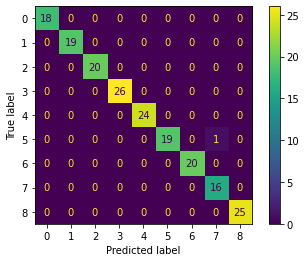

In [26]:
# Predict Base
Model=LogisticRegression(penalty='none')
Model.fit(X_train, y_train) 
Yp=Model.predict(X_test)

print(classification_report(y_test, Yp))

plot_confusion_matrix(Model, X_test, y_test)
plt.show()

Se observa que con un modelo sencillo se pueden alcanzar resultados casi perfectos, por lo que se aspira alcanzar resultados similares con los modelos siguientes luego de obtener sus mejores hiperparámetros mediante busqueda aleatoria.

#### Redes Neuronales

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.51      0.74      0.61        27
           2       0.76      0.81      0.79        16
           3       1.00      1.00      1.00        20
           4       0.39      1.00      0.56        19
           5       0.52      0.48      0.50        23
           6       1.00      0.67      0.80        18
           7       0.38      0.19      0.25        27
           8       0.47      0.67      0.55        12

    accuracy                           0.57       188
   macro avg       0.56      0.62      0.56       188
weighted avg       0.53      0.57      0.53       188



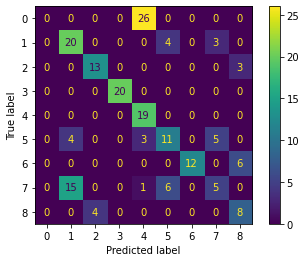

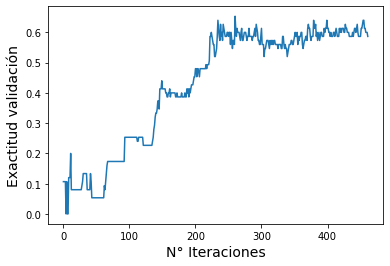

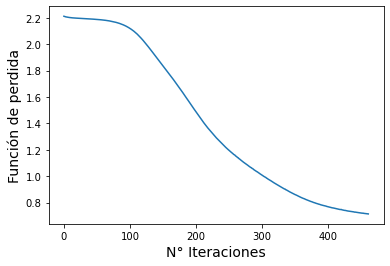

In [34]:
Model = MLPClassifier(hidden_layer_sizes=(100,100,100,100),activation='relu',alpha=0.001, learning_rate='constant', learning_rate_init=0.0001,early_stopping=True,n_iter_no_change=200,max_iter=5000) #, max_iter=2000)
Model.fit(X_train, y_train) 
Yp=Model.predict(X_test)

print(classification_report(y_test, Yp))

plot_confusion_matrix(Model, X_test, y_test)
plt.show()

plt.plot(Model.validation_scores_)
plt.xlabel('N° Iteraciones', fontsize=14)
plt.ylabel('Exactitud validación', fontsize=14)
plt.show()

plt.plot(Model.loss_curve_)
plt.xlabel('N° Iteraciones', fontsize=14)
plt.ylabel('Función de perdida', fontsize=14)
plt.show()

**RandomSearch**

In [35]:
parameter_space = {
    'hidden_layer_sizes': [(sp_randint.rvs(10,200,1),sp_randint.rvs(10,200,1),),
                                          (sp_randint.rvs(10,200,1),)],  #sp_randint.rvs(low, high, size)
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': stats.uniform(0.0001, 0.9), #L2 penalty
    'learning_rate_init': stats.uniform(0.00001, 0.001)}


random_search = RandomizedSearchCV(Model, param_distributions=parameter_space,n_iter=20, cv=5)
random_search.fit(X_train, y_train)
Resultados_RandomSearch=random_search.cv_results_;
print(max(Resultados_RandomSearch['mean_test_score']))

0.9692527964205817


In [42]:
pd.DataFrame(Resultados_RandomSearch)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.223119,0.074194,0.000798,7.460610e-04,logistic,0.69982,"(120, 47)",0.000432,"{'activation': 'logistic', 'alpha': 0.69982023...",0.120000,0.100000,0.113333,0.120805,0.114094,0.113647,0.007458,20
1,4.991393,1.358093,0.001000,1.370440e-06,relu,0.632094,"(120, 47)",0.000674,"{'activation': 'relu', 'alpha': 0.632093873276...",0.666667,0.686667,0.706667,0.724832,0.818792,0.720725,0.052752,5
2,4.999571,1.895914,0.000600,4.898240e-04,tanh,0.553617,"(120, 47)",0.000277,"{'activation': 'tanh', 'alpha': 0.553616519638...",0.953333,0.466667,0.940000,0.939597,0.966443,0.853208,0.193524,3
3,1.169287,0.229885,0.000200,3.995895e-04,relu,0.597423,"(167,)",0.000926,"{'activation': 'relu', 'alpha': 0.597422738232...",0.460000,0.473333,0.460000,0.469799,0.456376,0.463902,0.006493,8
4,1.627388,0.843228,0.000600,4.899795e-04,tanh,0.476553,"(167,)",0.000132,"{'activation': 'tanh', 'alpha': 0.476553463116...",0.186667,0.460000,0.120000,0.469799,0.395973,0.326488,0.145175,11
5,2.404523,0.666645,0.000800,4.001382e-04,tanh,0.867477,"(120, 47)",0.000065,"{'activation': 'tanh', 'alpha': 0.867476769934...",0.320000,0.200000,0.360000,0.463087,0.308725,0.330362,0.084928,10
6,1.521200,0.264088,0.001000,8.313940e-07,relu,0.86776,"(167,)",0.000815,"{'activation': 'relu', 'alpha': 0.867759981374...",0.453333,0.446667,0.466667,0.624161,0.449664,0.488098,0.068374,7
7,3.372135,1.313279,0.000600,4.901350e-04,tanh,0.156256,"(167,)",0.000586,"{'activation': 'tanh', 'alpha': 0.156256408844...",0.940000,0.920000,0.946667,0.859060,0.456376,0.824421,0.186598,4
8,1.257310,0.248214,0.001000,6.324101e-04,logistic,0.57529,"(167,)",0.0006,"{'activation': 'logistic', 'alpha': 0.57529034...",0.333333,0.226667,0.246667,0.100671,0.234899,0.228447,0.074437,16
9,0.987108,0.109541,0.000400,4.895706e-04,logistic,0.742133,"(167,)",0.00065,"{'activation': 'logistic', 'alpha': 0.74213277...",0.113333,0.240000,0.246667,0.234899,0.114094,0.189799,0.062236,18


In [37]:
random_search.best_score_

0.9692527964205817

In [36]:
random_search.best_params_

{'activation': 'tanh',
 'alpha': 0.4222487000923102,
 'hidden_layer_sizes': (120, 47),
 'learning_rate_init': 0.0007045242067102973}

#### SVM

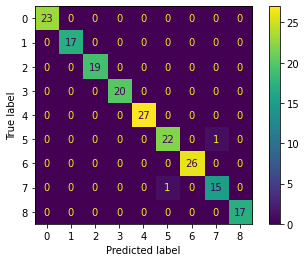

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        27
           5       0.96      0.96      0.96        23
           6       1.00      1.00      1.00        26
           7       0.94      0.94      0.94        16
           8       1.00      1.00      1.00        17

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [46]:
Model = SVC(kernel='rbf',C=2) #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
Model.fit(X_train, y_train) 
Yp=Model.predict(X_test)

plot_confusion_matrix(Model, X_test, y_test)
plt.show()


print(classification_report(y_test, Yp))


**RandomSearch**

#### Random Forest

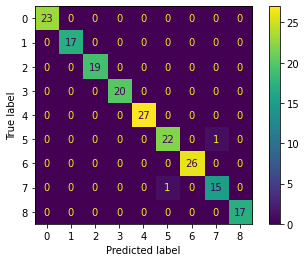

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        27
           5       0.96      0.96      0.96        23
           6       1.00      1.00      1.00        26
           7       0.94      0.94      0.94        16
           8       1.00      1.00      1.00        17

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [47]:
Model=RandomForestClassifier(n_estimators=10) 
Model.fit(X_train, y_train) 
Yp=Model.predict(X_test)

plot_confusion_matrix(Model, X_test, y_test)
plt.show()


print(classification_report(y_test, Yp))


**RandomSearch**

#### K-Nearest Neighbors

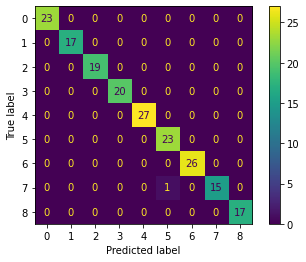

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        27
           5       0.96      1.00      0.98        23
           6       1.00      1.00      1.00        26
           7       1.00      0.94      0.97        16
           8       1.00      1.00      1.00        17

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [48]:
Model = KNeighborsClassifier(n_neighbors=5)
Model.fit(X_train, y_train) 
Yp=Model.predict(X_test)

plot_confusion_matrix(Model, X_test, y_test)
plt.show()


print(classification_report(y_test, Yp))


**RandomSearch**

# Evaluación conjunta de modelos en conjunto de test

# Conclusiones